#  Project 3D

**by Kartikeya Kumar and Karan Shah**

In [1]:
import numpy as np
import matplotlib.pyplot as plt # Core plotting support
%matplotlib inline

np.random.seed(1611044230)

def show_grid (grid):
    plt.matshow (grid)

In [2]:
#Global Variables
num_countries = 8 #No of countries on the map
M = 20 #Grid size M x N
N = 20
POP_DENSITY = 100 #Max number of people in each cell
attributes = ["Country No " , "Population Density", "Wealth Score", "Elevation", "Birth Rate1","Birth Rate2" ,"Death Rate1", "Death Rate2",  "Population Counter", "Temperature"]


In [3]:
# It takes in mean and size and returns a Gaussian distribution as proposed in conceptual model. 
# Check distributionGen.ipnyb for plots.

def create_distribution(size, p):
    assert(p>=0.0 and p<=1.0),"Straight outta bounds"
    sigma = 1
    mu = 0
    s = size

    x = np.linspace(0,1,s)
    y=1/( np.sqrt(2 * np.pi) *np.exp((-6*p+6*x)**2 / 2))
    y=y/0.4

    maxind = np.searchsorted(y,1.0)
    minind = np.searchsorted(y,0.0)

    y=y[minind:maxind]
    np.random.shuffle(y)

    return y

In [4]:
#Initialize the World Grid and assign numbers to countries. Need to make this dynamic
def initialize_world(m, n, num_attributes, num_countries):
    world = np.empty([m, n, num_attributes], dtype = float)
    no = num_countries/2
    for k in range(1, num_countries+1):
        if k <= no:
            naxis = 0
            maxis = k
        else:
            naxis = 1
            maxis = k-no
            
        world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,0]=k
    
    return world


In [5]:
#Initialize the Dictionary representing each country and their attribute values
#print(len(attributes))
#print(np.zeros( len(attributes)))
def initialize_country_properties(num_countries):
    country_properties = {}
    for i in range(1, num_countries + 1):
        value = np.zeros(len(attributes))
        value[0] = i
        value[1] = np.random.uniform(0.3, 0.8)      #Popdensity
        value[2] = np.random.uniform()              #Wealth
        value[3] = np.random.uniform()              #Elevation
        value[4] = np.random.uniform(0.0,0.07)       #Birth Rate1 
        value[5] = np.random.uniform(0.0,0.0001)     #Birth Rate2
        value[6] = np.random.uniform(0.0,0.02)      #Death Rate1 
        value[7] = np.random.uniform(0.0,0.0004)     #Death Rate2
        country_properties[i] = value
    #print(country_properties)
    return country_properties

In [6]:
def distribute_values(M, N, dataArray):
    
    no = num_countries/2
    tempdiff = 30.0/M
    naxis = 0
    maxis = 0
    
    #print(dataArray)
    for k in dataArray:
        if k <= no:
            naxis = 0
            maxis = k
        else:
            naxis = 1
            maxis = k-no
                
        for i in range(1,4):
            #dist = create_distribution(world[:,:,i].size,dataArray[k][i] )
            
            dist = create_distribution(world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i].size, dataArray[k][i])
            dist = np.reshape(dist, world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i].shape)
            
            if(i == 1):
                world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i] = dist*POP_DENSITY
                totalpop = np.sum(dist)*POP_DENSITY
                dataArray[k][len(attributes) - 2] = totalpop
                world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,len(attributes) - 2] = totalpop
                
            else:
                world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i] = dist
       
        #world[(maxis-1)*M/no:maxis*M/no, ((naxis)/2)*N: ((naxis+1)/2)*N,len(attributes)-1] =
        #POP_DENSITY* world[(maxis-1)*M/no:maxis*M/no, ((naxis)/2)*N: ((naxis+1)/2)*N,1]
        #totalpop = np.sum(world[(maxis-1)*M/no:maxis*M/no, ((naxis)/2)*N: ((naxis+1)/2)*N,len(attributes)-1])
        #dataArray[k][len(attributes) - 1] = totalpop
        
        for i in range(4,8):
            world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i] = dataArray[k][i]
            
    for i in range(M): #3D: Added temperature
        world[i,:,9] = 30-i*tempdiff
        
    #print(dataArray)

In [7]:
#Population change logistic equation
def pop_change(dataArray):
    no = num_countries/2
    naxis = 0
    maxis = 0
    w2 = np.square(world[:,:,1])
    
    for k in dataArray:
        if k <= no:
            naxis = 0
            maxis = k
        else:
            naxis = 1
            maxis = k-no
        
        a = dataArray[k][4]-dataArray[k][6]
        b = dataArray[k][5]+dataArray[k][7]
        p = world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1]
        p2 = np.square(p)
        delp = p*a-p2*b
        delp2 = -dataArray[k][6]*p - dataArray[k][7]*p2
        
        temp = world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1]
        #print(temp.shape)
        btemp = ((temp+delp) < POP_DENSITY)
        #print(btemp.shape)
        #print(delp.shape)
        temp[btemp] += delp[btemp]
        #print(temp.shape)
        temp[np.invert(btemp)] += delp2[np.invert(btemp)]
        #print(temp.shape)
        
        world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1] = temp
        totalpop = np.sum(world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1])
        #print(world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1]>POP_DENSITY
        dataArray[k][len(attributes) - 2] = totalpop
        
    
    

In [8]:
#Find best countries for each cell to move to
def findDestMatrix(dataArray, w1 = 0.75, w2 = 0.25):
    destMatrix = np.zeros((M,N))
    scoreMatrix = np.zeros((M,N,num_countries))
    no = num_countries/2
    naxis = 0
    maxis = 0
    
    for k in dataArray:
        if k <= no:
            naxis = 0
            maxis = k
        else:
            naxis = 1
            maxis = k-no
        
        for l in dataArray:
            if(l==k):
                scoreMatrix[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,l-1] = -2
            else:
                cw = np.ones(world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1].shape)*dataArray[l][2]
                cp = np.ones(world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1].shape)*(np.abs(dataArray[l][1]-0.5))
                w = w1*(cw - world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,1])
                p = w2*cp
       
                scoreMatrix[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,l-1] = w+p
        
        destMatrix = np.argmax(scoreMatrix, axis = 2) + 1       
               
    return destMatrix

In [9]:
#Return the most desirable 3 locations in each country by wealth
def globalDesirability():
    result = {}
    naxis = 0
    maxis = 0
    no = num_countries/2
    
    for k in range(1, num_countries+1):
        if k <= no:
            naxis = 0
            maxis = k
        else:
            naxis = 1
            maxis = k-no
        cwealth = world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,2]
        #print(cwealth)
        c = cwealth.flatten()
        #print(c)
        c_1 = c.argsort()[-3:]
        #print(c_1)
        x_idx, y_idx = np.unravel_index(c_1, cwealth.shape)
        #Find max according to whatever function you want from cwealth
        #Handle indices like this: i+(maxis-1)*M/no, j+((naxis)/2)*N
        #print(list(zip(x_idx, y_idx)))
        temp = list(zip(x_idx, y_idx))
        for key in range(0, len(temp)):
            a = list(temp[key])
            a[0] = a[0] + (maxis-1)*M/no
            a[1] = a[1] + (naxis/2)* N
            temp[key] = a         
        result[k] = temp
    #print(result)
    return result
#result = globalDesirability()

In [10]:
#Make world
world = initialize_world(M, N, len(attributes), num_countries)
country_properties = initialize_country_properties(num_countries)
distribute_values(M,N,country_properties)
m = findDestMatrix(country_properties, 0.75,  0.25) 
print("Destination matrix:")
print(m)

Destination matrix:
[[1 1 1 1 1 1 1 1 1 1 5 5 8 5 5 5 5 5 5 5]
 [1 1 8 8 8 1 8 1 8 1 5 5 8 5 5 8 5 5 5 5]
 [1 1 1 1 1 1 1 1 1 1 5 5 8 8 5 8 5 5 5 8]
 [1 8 1 1 1 1 1 8 8 8 5 5 5 5 5 5 8 5 5 5]
 [8 1 1 8 1 1 1 8 1 1 8 5 5 5 5 5 5 5 5 8]
 [2 8 2 2 8 2 2 2 2 8 6 6 6 6 6 6 6 8 6 6]
 [2 8 2 2 2 2 2 2 2 8 6 8 6 6 6 6 6 6 6 8]
 [2 2 2 2 2 2 2 2 2 2 6 6 6 8 6 6 6 6 6 6]
 [2 8 2 8 2 2 2 2 2 2 6 6 6 8 8 6 6 6 6 8]
 [2 2 2 8 8 2 2 2 8 2 6 6 6 6 6 6 6 6 8 6]
 [3 3 3 3 3 3 8 3 3 8 7 8 7 7 7 7 7 7 7 7]
 [8 3 8 3 8 8 3 3 3 3 8 7 7 7 8 7 8 7 7 7]
 [3 3 8 3 3 3 3 3 3 3 7 7 7 8 7 7 7 8 8 7]
 [3 3 3 3 3 3 3 3 3 3 7 7 7 8 8 7 7 7 7 7]
 [3 3 3 8 3 3 3 3 3 3 7 8 8 7 7 8 8 7 7 7]
 [4 4 4 4 4 8 8 4 4 4 8 5 8 8 8 8 5 8 8 5]
 [8 8 4 8 4 4 4 4 4 8 5 8 8 8 8 8 8 5 8 8]
 [8 8 4 4 4 4 8 4 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 4 4 4 4 8 4 4 4 8 8 8 5 5 8 8 8 8 8 8]
 [4 4 8 4 8 4 4 4 4 8 8 8 8 5 8 8 8 8 8 8]]


-c:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:38: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:22: DeprecationWarning: using a non-integer number instead of an integer will result 

Country 1 : 2004.0
Country 2 : 2019.0
Country 3 : 2037.0
Country 4 : 1891.0
Country 5 : 2023.0
Country 6 : 2035.0
Country 7 : 1994.0
Country 8 : 2035.0
The plots represent different attributes of the world grid. The first plot is shows the different countries. The other plots show different attributes on a cellular level.


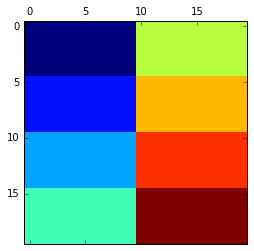

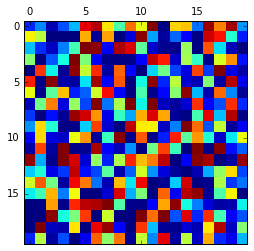

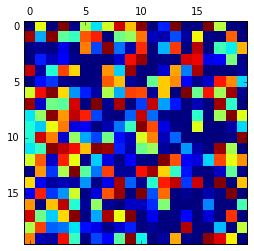

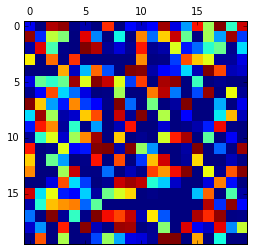

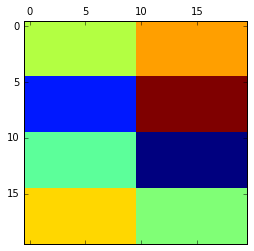

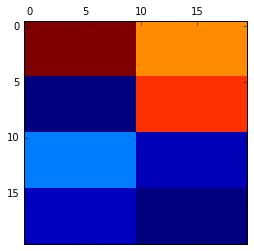

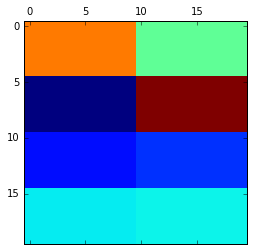

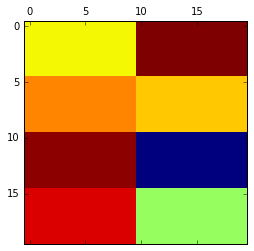

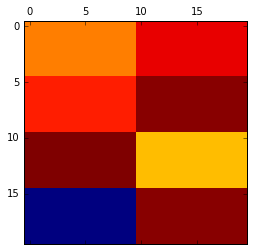

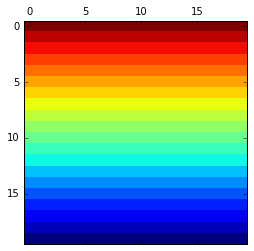

In [11]:
#Plot the World Grid
def plot_world():
    for k in country_properties:
        print("Country "+str(k)+" : "+str(np.floor(country_properties[k][len(attributes) - 2])))
    print("The plots represent different attributes of the world grid. The first plot is shows the different countries. The other plots show different attributes on a cellular level.")
#"Country No " , "Population Density", "Wealth Score", "Elevation", "Birth Rate1","Birth Rate2" ,"Death Rate1", "Death Rate2",  "Population Counter", "Temperature"
    show_grid(world[:,:,0])
    show_grid(world[:,:,1])
    show_grid(world[:,:,2])
    show_grid(world[:,:,3])
    show_grid(world[:,:,4])
    show_grid(world[:,:,5])
    show_grid(world[:,:,6])
    show_grid(world[:,:,7])
    show_grid(world[:,:,8])
    show_grid(world[:,:,9])

#Comment to hide
plot_world()

Initial population
Country 1 : 2004.0
Country 2 : 2019.0
Country 3 : 2037.0
Country 4 : 1891.0
Country 5 : 2023.0
Country 6 : 2035.0
Country 7 : 1994.0
Country 8 : 2035.0


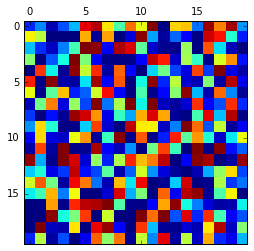

-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:33: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


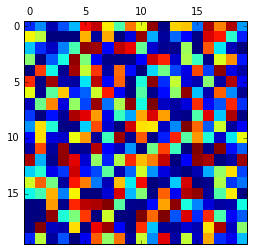

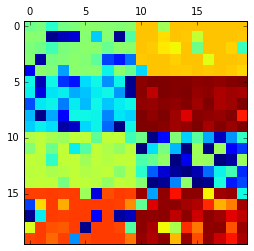

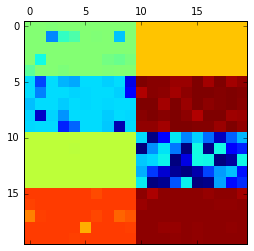

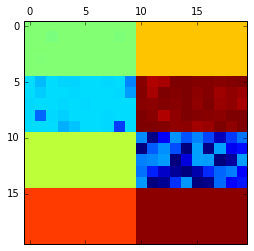

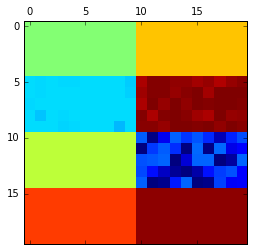

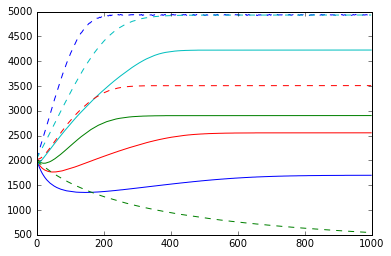

Final population
Country 1 : 2556.0
Country 2 : 1700.0
Country 3 : 2904.0
Country 4 : 4225.0
Country 5 : 3508.0
Country 6 : 4935.0
Country 7 : 544.0
Country 8 : 4931.0


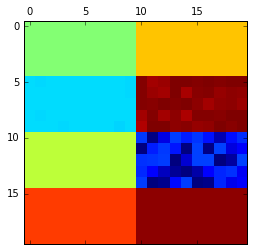

In [12]:
#Shows how population changes with time.
def showPopChange():
    print("Initial population")
    for k in country_properties:
        print("Country "+str(k)+" : "+str(np.floor(country_properties[k][len(attributes) - 2])))

    show_grid(world[:,:,1])
    plt.show()
    t=1000
    x = np.zeros(t)
    y = np.zeros((num_countries,t))
    for i in range(t):
        x[i] = i
        for k in country_properties:
            y[k-1][i] = np.floor(country_properties[k][len(attributes) - 2])
        pop_change(country_properties)
        if(i%(t/5)==0):
            show_grid(world[:,:,1])
            plt.show()

    plt.plot(x,y[0,:],'r',x,y[1,:],'b',x,y[2,:],'g',x,y[3,:],'c',x,y[4,:],'r--',x,y[5,:],'b--',x,y[6,:],'g--',x,y[7,:],'c--')
    plt.show()          
    print("Final population")
    for k in country_properties:
        print("Country "+str(k)+" : "+str(np.floor(country_properties[k][len(attributes) - 2])))
    show_grid(world[:,:,1])
    plt.show()
    
#Comment to hide
showPopChange()